In [75]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [76]:
df = pd.read_csv("data/train.csv")

df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# Examine the usual suspects: head, tail, unique values etc.
# Show the first 5 rows
print(df.head())

# Show the last 5 rows
print(df.tail())

# Show summary info (including datatypes and non-null counts)
print(df.info())

# Show basic statistics for numerical columns
print(df.describe())

# List all column names
print(df.columns)

# Get the number of unique values per column
print(df.nunique())

# Check for missing values per column
print(df.isnull().sum())

   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]
        ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1 

In [78]:
# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

In [79]:
# Display the shape
print("Shape:", df.shape)

# Display the columns
print("Columns:", df.columns)

# Display info
print("Info:")
df.info()

Shape: (4209, 378)
Columns: Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


float: Columns with decimal numbers (e.g., 3.14, 2.0).

int: Columns with whole numbers (e.g., 1, 42, -7).

object: Columns with text, strings, or mixed types (e.g., 'abc', 'k', categorical data).

In [80]:
# ========== 1. Correlation Table with Target y ==========
correlations = df.corr(numeric_only=True)['y'].drop('y').sort_values(ascending=False)

top_corr_table = correlations.head(15).reset_index()
top_corr_table.columns = ['Feature', 'Correlation_with_y']

bottom_corr_table = correlations.tail(15).reset_index()
bottom_corr_table.columns = ['Feature', 'Correlation_with_y']

print("=== Top 15 Positive Correlations with y ===")
print(top_corr_table, "\n")

print("=== Top 15 Negative Correlations with y ===")
print(bottom_corr_table, "\n")


# ========== 2. Categorical Summary Table ==========
cat_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

categorical_summary = {}
for col in cat_features:
    summary = df.groupby(col)['y'].agg(['count','mean']).sort_values('mean', ascending=False)
    categorical_summary[col] = summary
    print(f"\n=== Summary for {col} ===")
    print(summary.head(10))  # show top 10 categories by mean y


# ========== 3. Low-Variance Feature Table ==========
numeric_features = df.drop(columns=['ID','y'] + cat_features).columns

feature_variance = df[numeric_features].var().sort_values()
low_variance_table = feature_variance[feature_variance == 0].reset_index()
low_variance_table.columns = ['Feature', 'Variance']

print("\n=== Low-Variance Features (Variance = 0, likely removable) ===")
print(low_variance_table)

=== Top 15 Positive Correlations with y ===
   Feature  Correlation_with_y
0     X314            0.606005
1     X261            0.588785
2     X263            0.379629
3     X136            0.368177
4     X275            0.275042
5     X119            0.272728
6     X118            0.272728
7      X51            0.229999
8     X264            0.228169
9     X126            0.223975
10    X179            0.218034
11    X130            0.216763
12    X311            0.210318
13     X66            0.201035
14    X198            0.195290 

=== Top 15 Negative Correlations with y ===
   Feature  Correlation_with_y
0     X279           -0.379629
1     X232           -0.379629
2     X127           -0.510620
3      X11                 NaN
4      X93                 NaN
5     X107                 NaN
6     X233                 NaN
7     X235                 NaN
8     X268                 NaN
9     X289                 NaN
10    X290                 NaN
11    X293                 NaN
12    X297 

### 📊 What this produces:
	1.	Top & bottom 15 correlations with y → shows most relevant features.
	2.	Categorical summary table → count + mean target value for each category.
	3.	Low-variance table → features with zero variance (same value everywhere, can be dropped).

---

In [81]:
import pandas as pd

# Load the datasets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# Inspect the datasets
train_shape = train.shape
test_shape = test.shape
train_head = train.head()
train_info = train.info()
train_description = train.describe()

train_shape, test_shape, train_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


((4209, 378),
 (4209, 377),
    ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
 0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
 1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
 2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
 3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
 4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   
 
    X380  X382  X383  X384  X385  
 0     0     0     0     0     0  
 1     0     0     0     0     0  
 2     0     1     0     0     0  
 3     0     0     0     0     0  
 4     0     0     0     0     0  
 
 [5 rows x 378 columns])

# Here’s what the Exploratory Data Analysis (EDA) reveals from train.csv:

🔎 Findings
	1.	Target (y):

	•	Distribution is slightly right-skewed (some high outliers).

	•	Most values are between 70–130.

	2.	Categorical variables (X0–X8):

	•	Different numbers of categories (some with many distinct values).

	•	Uneven distributions — some categories dominate.

	3.	Binary numeric features (X10…X385):

	•	Most are sparse (mostly zeros).

	•	Some have meaningful variance.

	4.	Correlation with target y:

	•	Strongest positive correlations:

	•	X314 (0.61), X261 (0.59), X263 (0.38).

	•	Strongest negative correlation:

	•	X127 (-0.51).

	•	Many features have NaN correlation (constant features → no variance).
	

⸻

✅ Useful tables for correlations & EDA:

	•	Correlation table: Top 15 positive & negative correlations with y.

	•	Categorical summary table: Category counts & mean target value per category.

	•	Variance table: Identify low-variance binary features (to drop).


---

For Exploratory Data Analysis (EDA), we want to:

	1.	Distribution of target y → histogram + summary stats.

	2.	Categorical variables → frequency counts, bar plots.

	3.	Numeric variables → histograms for selected features.

	4.	Correlation matrix for numeric variables → identify relationships with y.

	5.	Variance & sparsity check → many features are binary, we should check variance.
	

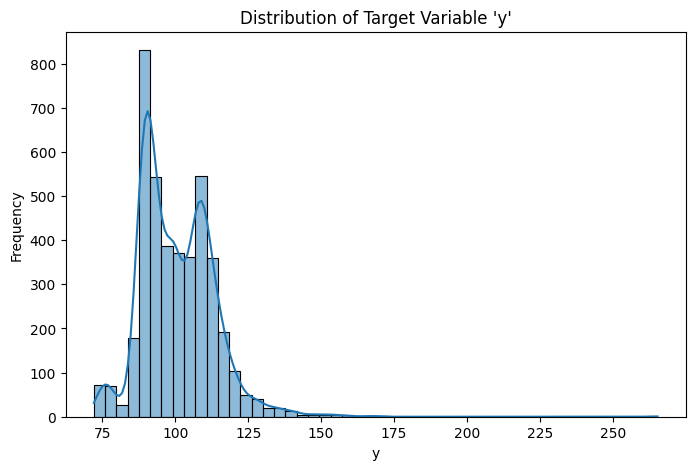

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train['y'], bins=50, kde=True)
plt.title("Distribution of Target Variable 'y'")
plt.xlabel("y")
plt.ylabel("Frequency")
plt.show()


=== Summary for X0 ===
    count        mean
X0                   
aa      2  152.170000
au     11  118.695455
ap    103  116.577864
a      21  115.630952
as     10  115.349000
r      10  113.914000
at     25  113.465200
af     35  112.791143
w     182  112.614121
x     300  112.555333


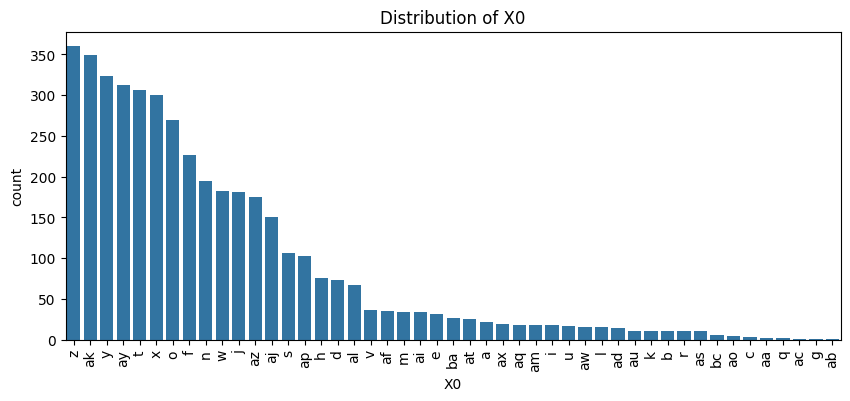


=== Summary for X1 ===
    count        mean
X1                   
e      33  107.337879
k      17  106.800000
i     203  105.727488
p       9  105.568889
f      23  104.522609
h      29  103.672759
g       6  103.191667
m      32  102.788750
j      22  102.489545
n      19  102.463158


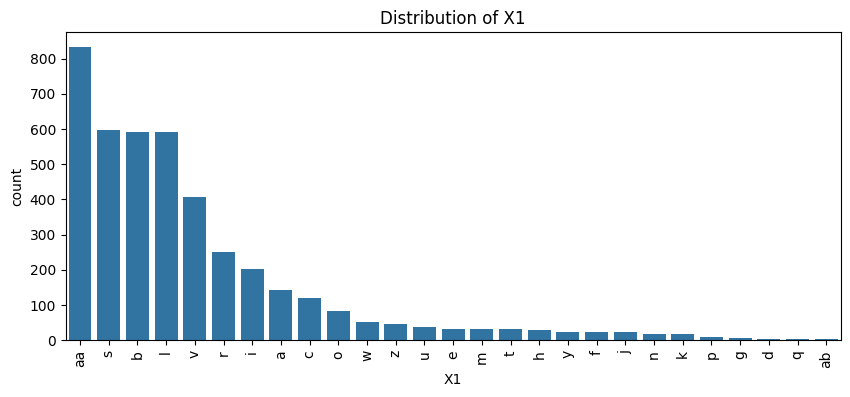


=== Summary for X2 ===
    count        mean
X2                   
aa      1  146.300000
ar      1  131.980000
am      1  122.510000
s      94  116.977447
k      25  114.950400
al      5  113.362000
ah      4  112.947500
ap     11  112.791818
ao     20  112.512000
g      12  112.280833


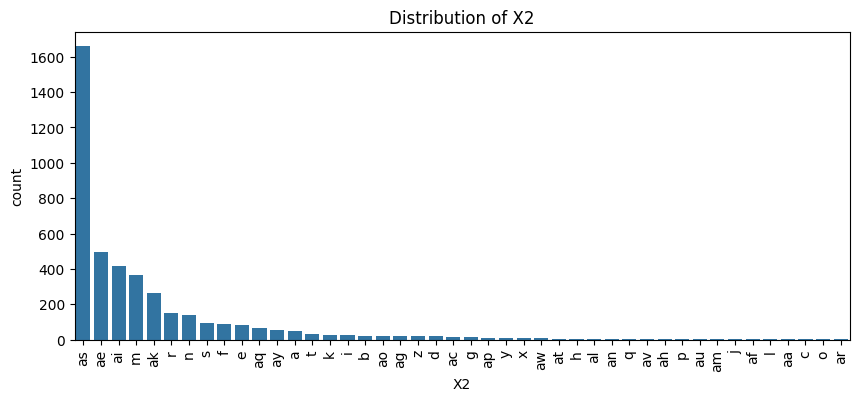


=== Summary for X3 ===
    count        mean
X3                   
d     290  105.114414
a     440  102.507477
c    1942  101.959269
g     241  100.428672
b      57  100.239649
e     163  100.033190
f    1076   96.564507


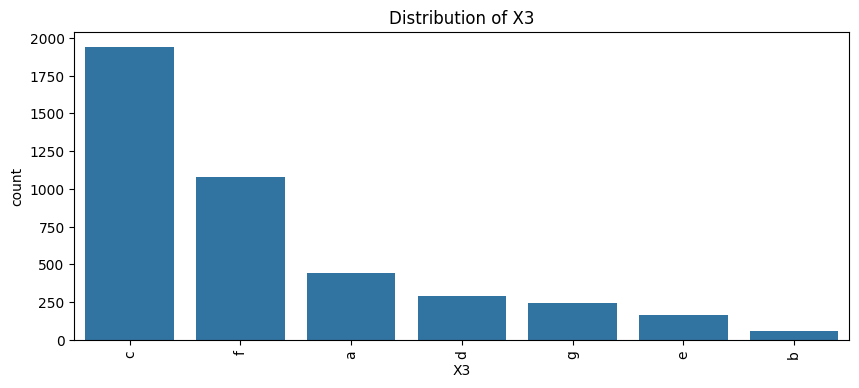


=== Summary for X4 ===
    count        mean
X4                   
c       1  134.040000
b       1  112.800000
a       2  101.100000
d    4205  100.658293


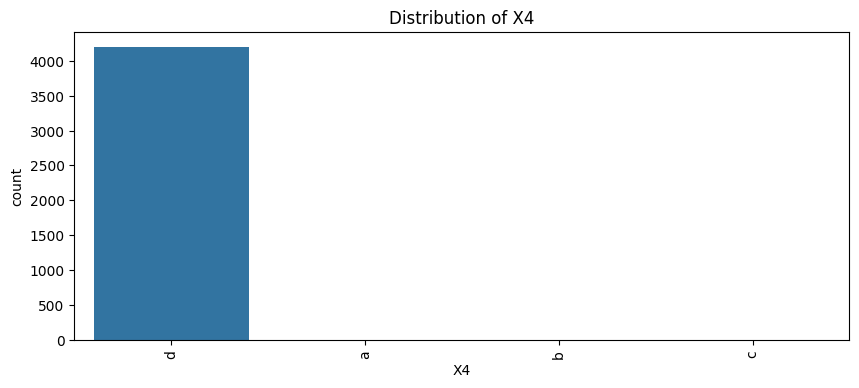


=== Summary for X5 ===
    count        mean
X5                   
u       1  130.810000
f       7  105.594286
ag    204  102.920147
n     212  102.594104
ab    197  102.503655
c     131  102.343130
m     208  101.768317
ad    185  101.493189
af    188  101.246968
i     207  100.994010


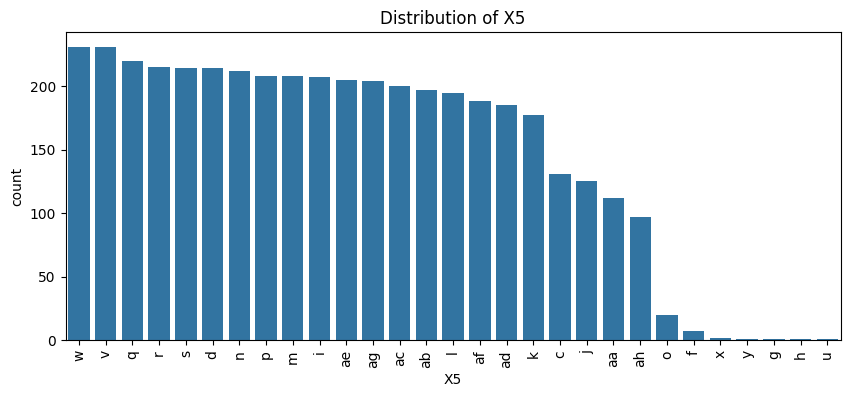


=== Summary for X6 ===
    count        mean
X6                   
e      12  109.751667
c      38  103.728421
h     190  103.134842
k      43  102.074884
d     625  101.346464
i     488  101.226803
j    1039  101.165245
g    1042  100.306286
l     478   98.945502
b      28   98.714286


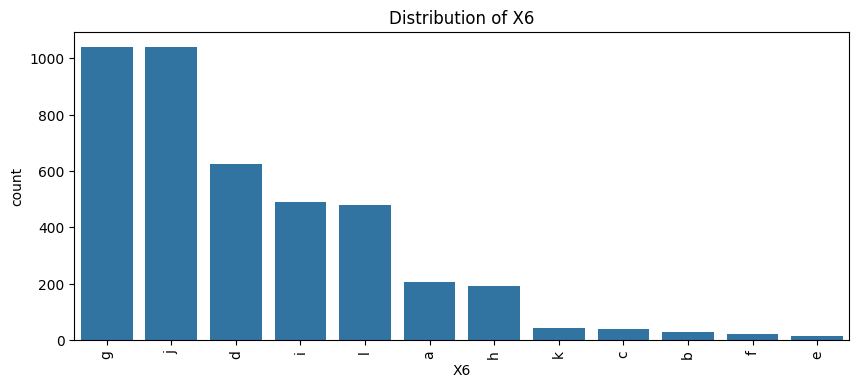


=== Summary for X8 ===
    count        mean
X8                   
e     225  104.976311
r     219  103.610548
h     117  103.446154
i     237  103.113418
q     117  102.551197
n     242  102.194215
v     194  101.943351
t     119  101.492017
y     116  101.435086
u     119  101.156723


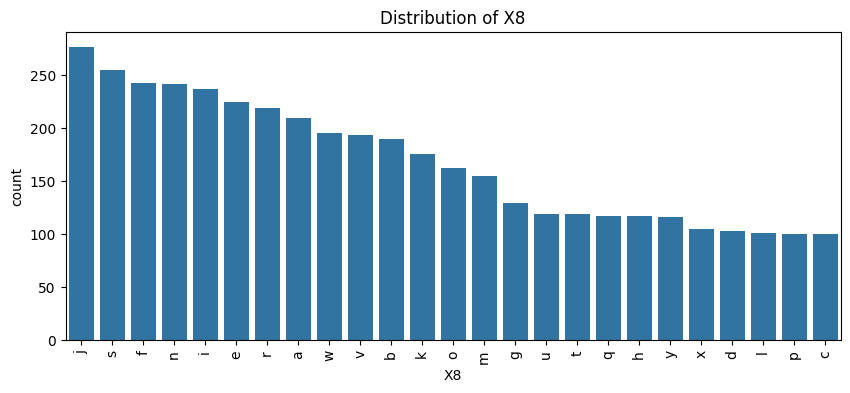

In [83]:
cat_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

for col in cat_features:
    # === Summary table ===
    summary = train.groupby(col)['y'].agg(['count','mean']).sort_values('mean', ascending=False)
    print(f"\n=== Summary for {col} ===")
    print(summary.head(10))  # show top 10 categories by mean y

    # === Plot ===
    plt.figure(figsize=(10,4))
    sns.countplot(x=train[col], order=train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

## let’s adjust the code so that the bar plots are ordered by the mean target y instead of just raw frequency.

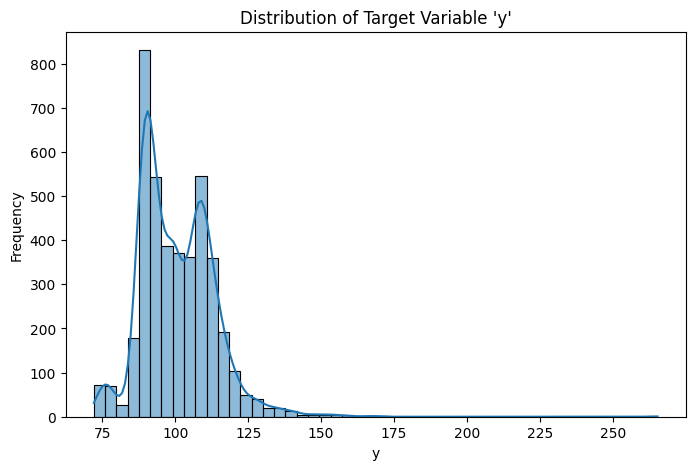

In [84]:
plt.figure(figsize=(8,5))
sns.histplot(train['y'], bins=50, kde=True)
plt.title("Distribution of Target Variable 'y'")
plt.xlabel("y")
plt.ylabel("Frequency")
plt.show()


=== Summary for X0 ===
    count        mean
X0                   
aa      2  152.170000
au     11  118.695455
ap    103  116.577864
a      21  115.630952
as     10  115.349000
r      10  113.914000
at     25  113.465200
af     35  112.791143
w     182  112.614121
x     300  112.555333


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


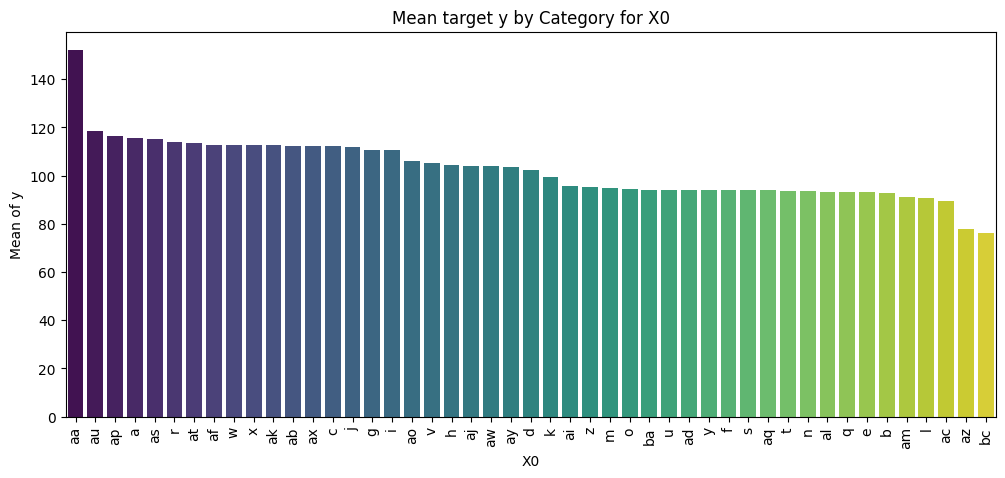


=== Summary for X1 ===
    count        mean
X1                   
e      33  107.337879
k      17  106.800000
i     203  105.727488
p       9  105.568889
f      23  104.522609
h      29  103.672759
g       6  103.191667
m      32  102.788750
j      22  102.489545
n      19  102.463158


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


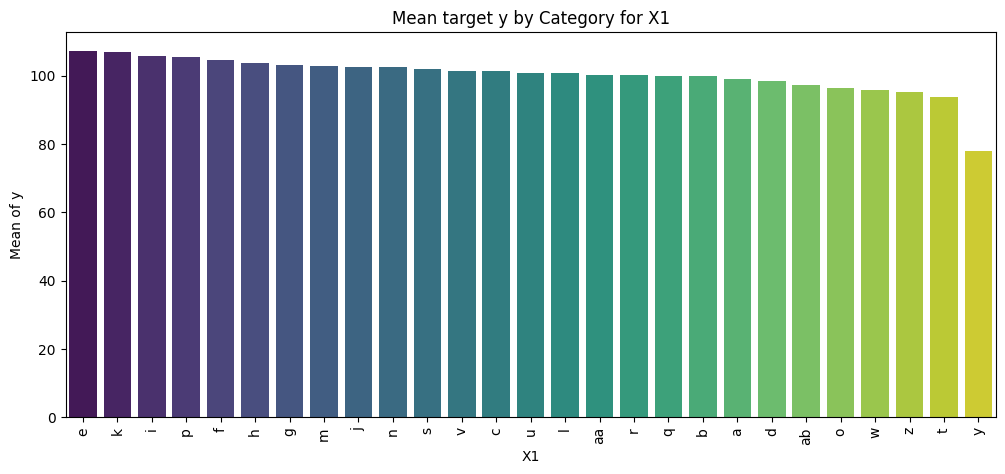


=== Summary for X2 ===
    count        mean
X2                   
aa      1  146.300000
ar      1  131.980000
am      1  122.510000
s      94  116.977447
k      25  114.950400
al      5  113.362000
ah      4  112.947500
ap     11  112.791818
ao     20  112.512000
g      12  112.280833


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


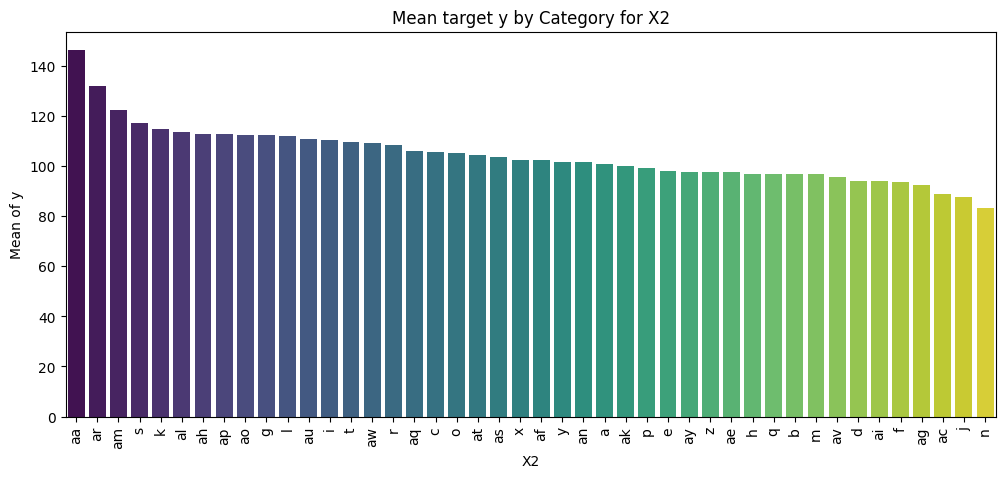


=== Summary for X3 ===
    count        mean
X3                   
d     290  105.114414
a     440  102.507477
c    1942  101.959269
g     241  100.428672
b      57  100.239649
e     163  100.033190
f    1076   96.564507


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


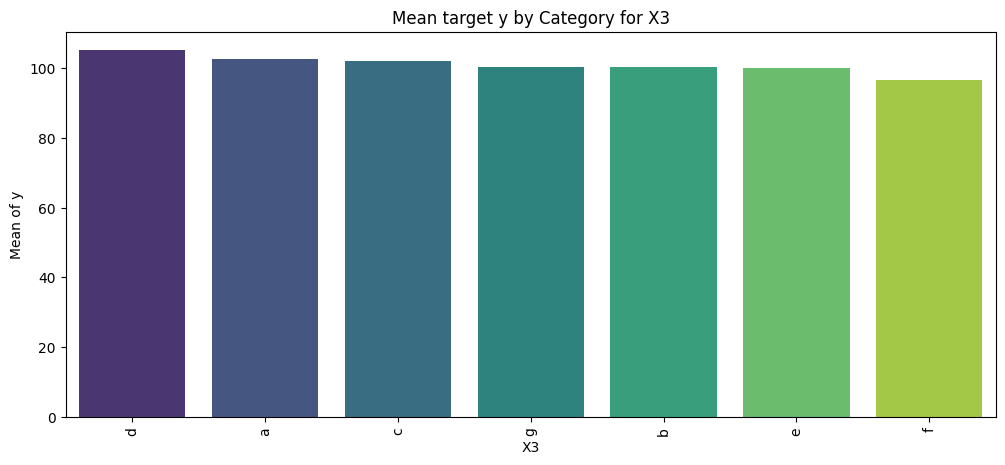


=== Summary for X4 ===
    count        mean
X4                   
c       1  134.040000
b       1  112.800000
a       2  101.100000
d    4205  100.658293


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


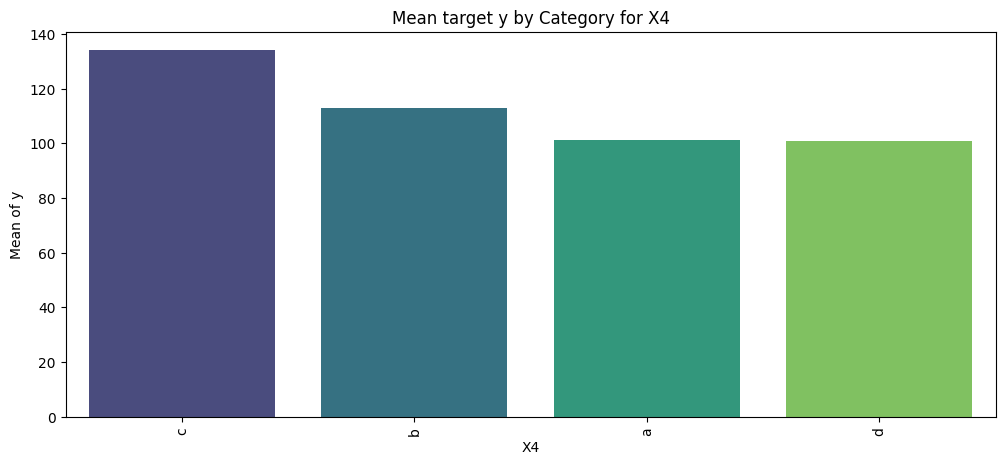


=== Summary for X5 ===
    count        mean
X5                   
u       1  130.810000
f       7  105.594286
ag    204  102.920147
n     212  102.594104
ab    197  102.503655
c     131  102.343130
m     208  101.768317
ad    185  101.493189
af    188  101.246968
i     207  100.994010


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


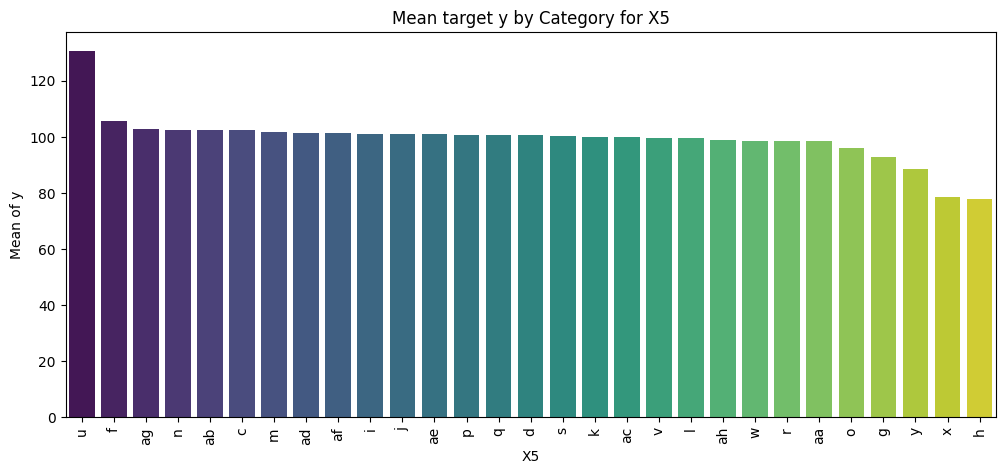


=== Summary for X6 ===
    count        mean
X6                   
e      12  109.751667
c      38  103.728421
h     190  103.134842
k      43  102.074884
d     625  101.346464
i     488  101.226803
j    1039  101.165245
g    1042  100.306286
l     478   98.945502
b      28   98.714286


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


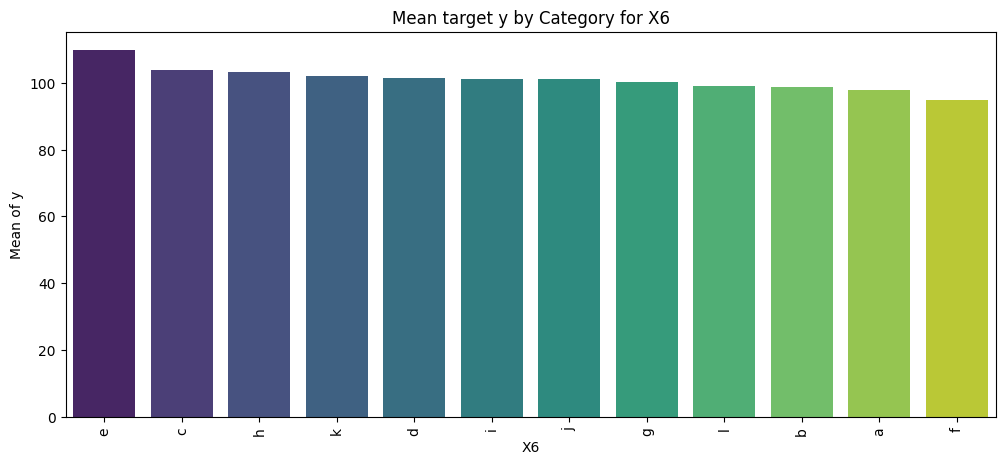


=== Summary for X8 ===
    count        mean
X8                   
e     225  104.976311
r     219  103.610548
h     117  103.446154
i     237  103.113418
q     117  102.551197
n     242  102.194215
v     194  101.943351
t     119  101.492017
y     116  101.435086
u     119  101.156723


/var/folders/81/qk8qq55j6f525lflghy2r_8w0000gn/T/ipykernel_11977/2095730803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")


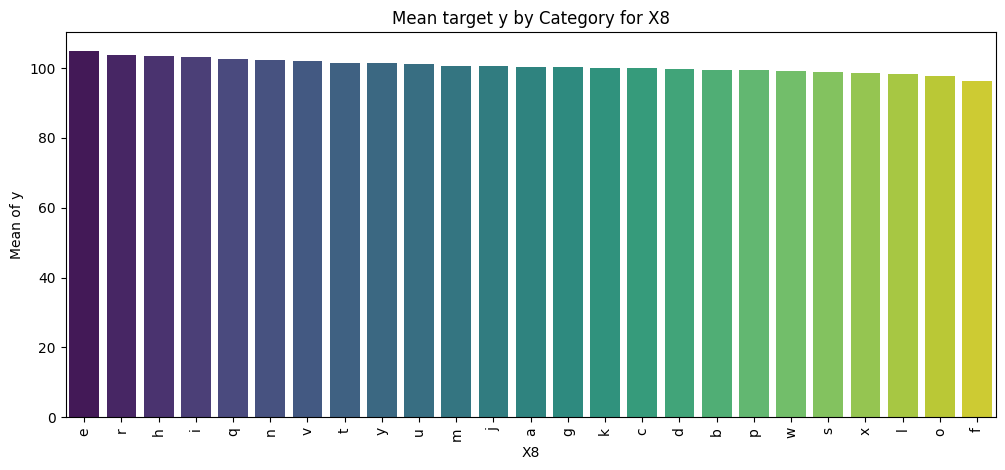

In [85]:
cat_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

for col in cat_features:
    # === Summary table ===
    summary = train.groupby(col)['y'].agg(['count','mean']).sort_values('mean', ascending=False)
    print(f"\n=== Summary for {col} ===")
    print(summary.head(10))  # top 10 categories by mean y

    # === Plot (sorted by mean y) ===
    ordered_categories = summary.index  # sorted by mean
    plt.figure(figsize=(12,5))
    sns.barplot(x=summary.index, y=summary['mean'], order=ordered_categories, palette="viridis")
    plt.title(f"Mean target y by Category for {col}")
    plt.ylabel("Mean of y")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

## 📌 Overall Observations
	•	X0 and X2 show the strongest variation in production time → key predictors.
	•	X1, X5, X6, X8 also contain meaningful signal.
	•	X3 and X4 show smaller variation, though some rare categories have extreme values (risk of overfitting).
	•	Rare categories (count = 1–5) often have extreme means → should be handled carefully (e.g., grouped or smoothed).

# PIPELINE
### Ridge Regresion

In [86]:
# ==============================
# Mercedes Benz Greener Mfg - Baseline Pipeline (Ridge Regression)
# ==============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
train = pd.read_csv("data/train.csv")

# ----------------------------
# 2. Preprocessing & Feature Engineering
# ----------------------------

# Drop ID
train = train.drop("ID", axis=1)

# Separate target
y = train["y"]
X = train.drop("y", axis=1)

# Identify categorical variables
cat_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

# Drop constant / zero-variance features
constant_features = [col for col in X.columns if X[col].nunique() == 1]
X = X.drop(columns=constant_features)

# One-hot encode categorical features
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

# Log-transform target
y_log = np.log1p(y)

# ----------------------------
# 3. Train/Validation Split
# ----------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# ----------------------------
# 4. Scaling (important for linear models)
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ----------------------------
# 5. Ridge Regression Training
# ----------------------------
ridge_model = Ridge(alpha=10, random_state=42)  # alpha = regularization strength
ridge_model.fit(X_train_scaled, y_train)

# ----------------------------
# 6. Evaluation
# ----------------------------
y_pred_val = ridge_model.predict(X_val_scaled)

rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print(f"\nValidation RMSE: {rmse:.4f}")
print(f"Validation R²: {r2:.4f}")


Validation RMSE: 0.0752
Validation R²: 0.6074


# datos

=== Low-Variance Features (Variance = 0, likely removable) ===
   Feature  Variance
0     X233       0.0
1      X11       0.0
2     X107       0.0
3     X293       0.0
4     X290       0.0
5     X330       0.0
6      X93       0.0
7     X268       0.0
8     X297       0.0
9     X235       0.0
10    X347       0.0
11    X289       0.0
12    X4

## one hot encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Load datasets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# Separate target
y = train["y"]
train = train.drop("y", axis=1)

# Drop IDs
train_ID = train["ID"]
test_ID = test["ID"]
train = train.drop("ID", axis=1)
test = test.drop("ID", axis=1)

# Categorical columns to encode
categorical_cols = ['X0','X1','X2','X3','X5','X6','X8']
numeric_cols = [col for col in train.columns if col not in categorical_cols]

# ----------------------------
# One-Hot Encoding
# ----------------------------
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

ohe_ct = ColumnTransformer(
    transformers=[
        ('cat', ohe, categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

X_train_ohe = ohe_ct.fit_transform(train)
X_test_ohe = ohe_ct.transform(test)

ohe_feature_names = list(ohe_ct.named_transformers_['cat'].get_feature_names_out(categorical_cols)) + numeric_cols

train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=train.index)
test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_feature_names, index=test.index)

# ----------------------------
# Ordinal Encoding
# ----------------------------
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

ord_ct = ColumnTransformer(
    transformers=[
        ('cat', ord_enc, categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

X_train_ord = ord_ct.fit_transform(train)
X_test_ord = ord_ct.transform(test)

ord_feature_names = categorical_cols + numeric_cols

train_ord = pd.DataFrame(X_train_ord, columns=ord_feature_names, index=train.index)
test_ord = pd.DataFrame(X_test_ord, columns=ord_feature_names, index=test.index)

# ----------------------------
# Final Output
# ----------------------------
print("OHE train shape:", train_ohe.shape)
print("Ordinal train shape:", train_ord.shape)
print(train_ohe.head())

OHE train shape: (4209, 553)
Ordinal train shape: (4209, 376)
  X0_aa X0_ab X0_ac X0_ad X0_af X0_ai X0_aj X0_ak X0_al X0_am  ... X375 X376  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0    0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    1    0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0    0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0    0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0    0   

  X377 X378 X379 X380 X382 X383 X384 X385  
0    1    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0  
2    0    0    0    0    1    0    0    0  
3    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0  

[5 rows x 553 columns]


/Users/raulguzman/Desktop/AIPM/mercedes/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# conclusions
-	Data:
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
Distribution is slightly right-skewed (some high outliers).
Most values are between 70–130.

-	Correlation with target:
0     X314            0.606005
1     X261            0.588785
2     X263            0.379629
3     X136            0.368177
4     X275            0.275042
5     X119            0.272728 

-	Columns with low variance to target:
0     X233       
1      X11       
2     X107       
3     X293       
4     X290       
5     X330       
6      X93       
7     X268       
8     X297       
9     X235       
10    X347   
11    X289       
-	X4 has no variance either
-	If low variance=0.01, the columns’ number increases to 147

-	Using mean target instead of raw frequency:
X0 and X2 show the strongest variation in production time → key predictors.
X1, X5, X6, X8 also contain meaningful signal.

-	Hot encoding to categorical columns: X0 to X8 (not including X4, X7)


# Numbers from Vane 
y 1.000000 (trivial, correlation with itself)

X314 0.606005

X261 0.588785

X263 0.379629

X136 0.368177

X0_ak 0.281835 ← OHE feature (X0 category “ak”)

X275 0.275042

X118 0.272728

X119 0.272728

X0_x 0.259727 ← OHE feature (X0 category “x”)

In [ ]:
# Define categorical columns
categorical_cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

# rename to OHE and set config /transform the output to a PD dataframe (requires sklearn version older than1.2)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas') 

ohe_transform = ohe.fit_transform(train[categorical_cols])

#print the transformed dataframe
print(ohe_transform.head())

   X0_a  X0_aa  X0_ab  X0_ac  X0_ad  X0_af  X0_ai  X0_aj  X0_ak  X0_al  ...  \
0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   X8_p  X8_q  X8_r  X8_s  X8_t  X8_u  X8_v  X8_w  X8_x  X8_y  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 195 columns]


In [ ]:
# Combine OHE with original dataframe (excluding original categorical columns)
train_ohe = train.drop(columns=categorical_cols).join(ohe_transform)
# check result
print(train_ohe.head())

   X10  X11  X12  X13  X14  X15  X16  X17  X18  X19  ...  X8_p  X8_q  X8_r  \
0    0    0    0    1    0    0    0    0    1    0  ...   0.0   0.0   0.0   
1    0    0    0    0    0    0    0    0    1    0  ...   0.0   0.0   0.0   
2    0    0    0    0    0    0    0    1    0    0  ...   0.0   0.0   0.0   
3    0    0    0    0    0    0    0    0    0    0  ...   0.0   0.0   0.0   
4    0    0    0    0    0    0    0    0    0    0  ...   0.0   0.0   0.0   

   X8_s  X8_t  X8_u  X8_v  X8_w  X8_x  X8_y  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   1.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 563 columns]


Top positive correlations with y:
 y        1.000000
X314     0.606005
X261     0.588785
X263     0.379629
X136     0.368177
X0_ak    0.281835
X275     0.275042
X119     0.272728
X118     0.272728
X0_x     0.259727
Name: y, dtype: float64

Top negative correlations with y:
 X107   NaN
X233   NaN
X235   NaN
X268   NaN
X289   NaN
X290   NaN
X293   NaN
X297   NaN
X330   NaN
X347   NaN
Name: y, dtype: float64


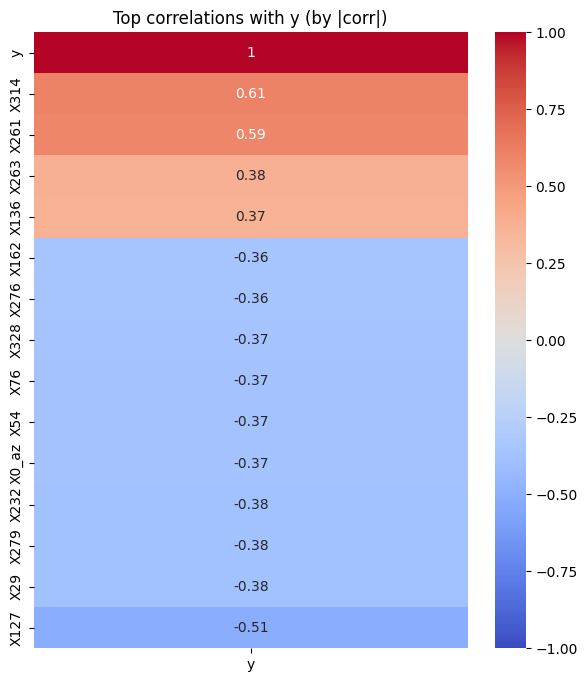

In [98]:
# Assuming you have the target stored separately as y
train_ohe_df = train_ohe.copy()  # If train_ohe is a DataFrame
train_ohe_df['y'] = y.values     # Add 'y' back

num_cols = train_ohe_df.select_dtypes(include=np.number).columns.tolist()
if 'ID' in num_cols:
    num_cols.remove('ID')

# --- Correlation (numeric only) with target y
corr_series = train_ohe_df[num_cols].corr()['y'].sort_values(ascending=False)

print("Top positive correlations with y:\n", corr_series.head(10))
print("\nTop negative correlations with y:\n", corr_series.tail(10))

# --- Top 15 by absolute correlation (often most useful)
top_abs = corr_series.abs().sort_values(ascending=False).head(15).index

plt.figure(figsize=(7,8))
sns.heatmap(
    train_ohe_df[top_abs].corr()[['y']].sort_values(by='y', ascending=False),
    annot=True, cmap="coolwarm", vmin=-1, vmax=1
)
plt.title("Top correlations with y (by |corr|)")
plt.show()

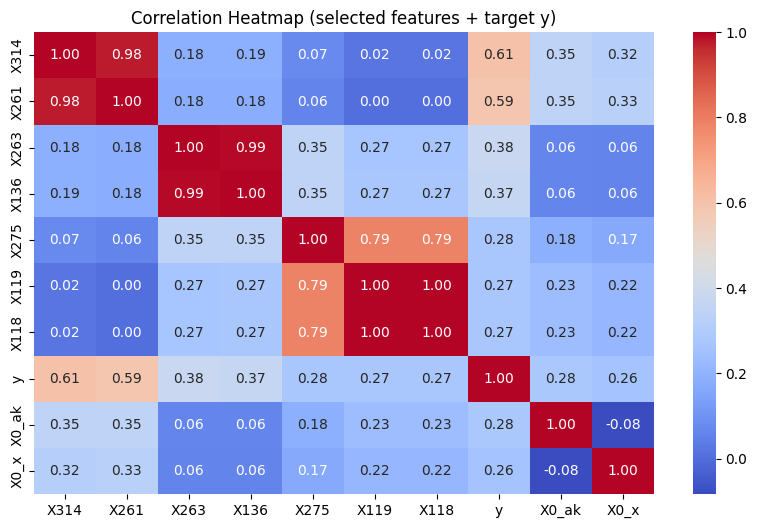

In [106]:
import pandas as pd

# Load data
train = pd.read_csv("data/train.csv")

# One-hot encode X0, but keep only X0_ak and X0_x
ohe_df = pd.get_dummies(train['X0'], prefix='X0')
ohe_selected = ohe_df[['X0_ak', 'X0_x']]

# Select your desired columns
cols_of_interest = ["X314", "X261", "X263", "X136", "X275", "X119", "X118", "y"]
df_selected = train[cols_of_interest]

# Combine with selected one-hot columns
eda_df = pd.concat([df_selected, ohe_selected], axis=1)

# Now you can do EDA (correlation, plots, etc.)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(eda_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (selected features + target y)")
plt.show()